In [21]:
import numpy as np
import pandas as pd
data=pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Data - Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1 ; 이진분류)

In [3]:
# 데이터 내 NA값 여부 확인
data.isnull().any() # 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [4]:
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 29


In [5]:
data.describe() # 요약 통계량

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [22]:
# 종속 변수의 분포 확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

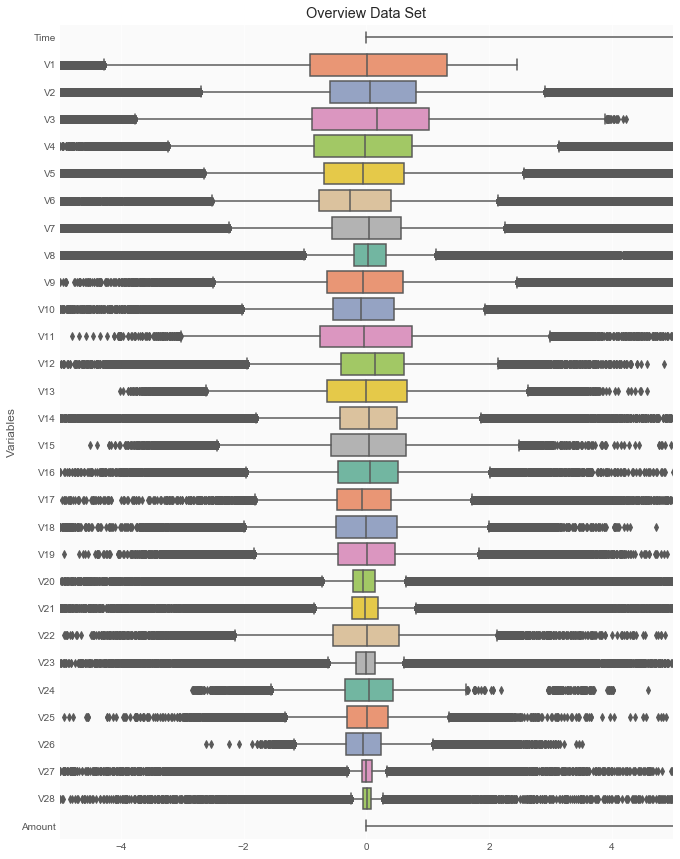

In [23]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize = (11, 15)) # 그래프 사이즈

ax.set_facecolor('#fafafa') # 그래프 색상값
ax.set(xlim = (-5, 5)) # X축 범위
plt.ylabel('Variables') # Y축 이름
plt.title("Overview Data Set") # 그래프 제목
ax = sns.boxplot(data = data.drop(columns = ['Class']), # V1 ~ V28 확인
                 orient = 'h', 
                 palette = 'Set2')

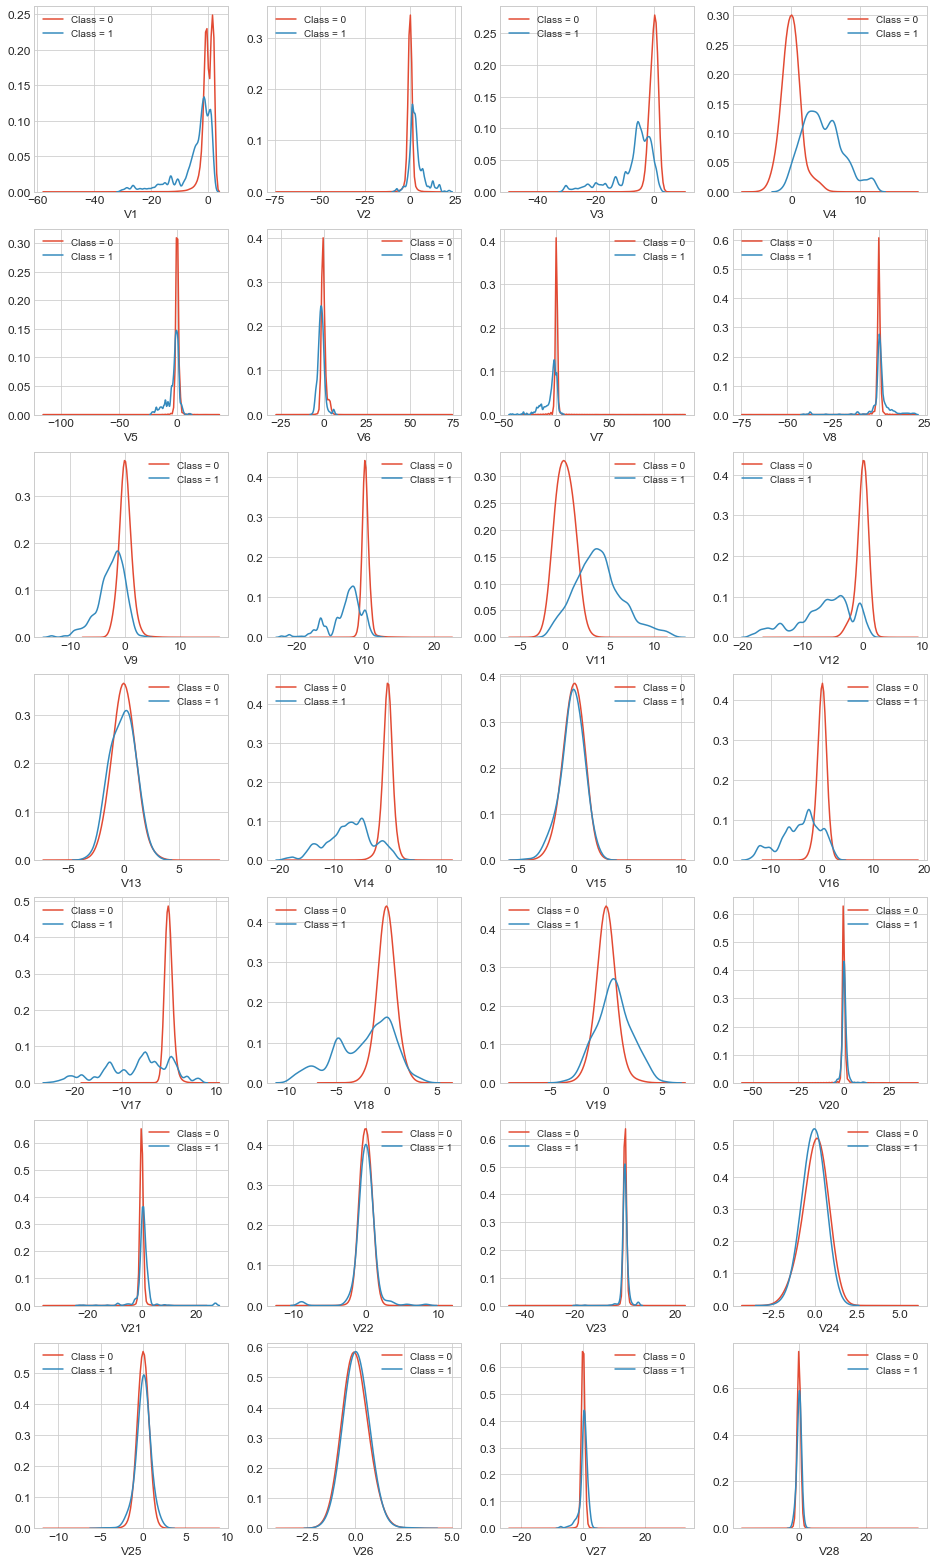

In [8]:
var = data.columns.values[:-1] # V1 ~ V28
i = 0
t0 = data.loc[data['Class'] == 0] # Class : 0 인 행만 추출
t1 = data.loc[data['Class'] == 1] # Class : 1 인 행만 추출

sns.set_style('whitegrid') # 그래프 스타일 지정
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28)) # 축 지정

for feature in var:
    i += 1
    plt.subplot(7, 4, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show();

#### 각 변수 별 그래프를 타겟변수에 대해서 그려보았을 떄 차이가 있는 변수들은 다음과 같이 정의할 수 있다.
- 1) 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11
- 2) 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
- 3) 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10

In [9]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [11]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)

# Light GBM을 기본 모델로 설정

In [25]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict) # 모델 분류 결과 평가

C:\Users\gpfla\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1-Score:  0.7151515151515151


In [14]:
lgb_model.predict(X_test)

array([[0.99888086, 0.00111914],
       [0.99891505, 0.00108495],
       [0.99512627, 0.00487373],
       ...,
       [0.99891505, 0.00108495],
       [0.99891505, 0.00108495],
       [0.99891505, 0.00108495]])

In [26]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'binary'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
pred= np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test) >0.5] =1
model_evaluation(y_test, pred)

C:\Users\gpfla\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1-Score:  0.7151515151515151


# SMOTE을 이용해서 Oversampling을 진행해보자!

In [19]:
# 기존의 X_train, y_train, X_test, y_test의 형태 확인
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [27]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm = SMOTE(random_state = 42, ratio = 0.3) # SMOTE 알고리즘, 비율 증가
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

ImportError: cannot import name 'MultiOutputMixin'

In [26]:
print("Before OverSampling, the shape of X_train: {}".format(X_train.shape)) # SMOTE 적용 이전 데이터 형태
print("Before OverSampling, the shape of y_train: {}".format(y_train.shape)) # SMOTE 적용 이전 데이터 형태
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape)) # SMOTE 적용 결과 확인
print('After OverSampling, the shape of y_train: {}'.format(y_train_res.shape)) # # SMOTE 적용 결과 확인

Before OverSampling, the shape of X_train: (227845, 28)
Before OverSampling, the shape of y_train: (227845, 1)
After OverSampling, the shape of X_train: (295690, 28)
After OverSampling, the shape of y_train: (295690,)


In [27]:
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param2 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2) # 학습 진행
lgb_model2_predict = np.argmax(lgb_model2.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model2_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.9990695551420246
Precision:  0.6967213114754098
Recall:  0.8415841584158416
F1-Score:  0.7623318385650223


# 그렇다면, Oversampling을 더 많이 해보자.

In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm2 = SMOTE(random_state = 42, ratio = 0.6) # SMOTE 알고리즘, 비율 60%
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 136472
After OverSampling, counts of label '0': 227454


In [29]:
lgb_dtrain3 = lgb.Dataset(data = pd.DataFrame(X_train_res2), label = pd.DataFrame(y_train_res2)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param3 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res2))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model3 = lgb.train(params = lgb_param3, train_set = lgb_dtrain3) # 학습 진행
lgb_model3_predict = np.argmax(lgb_model3.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model3_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.99626066500474
Precision:  0.3055555555555556
Recall:  0.8712871287128713
F1-Score:  0.45244215938303345


# 아예, 1:1 비율로 Oversampling을 해보자.

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm3 = SMOTE(random_state = 42) # SMOTE 알고리즘, Default: 동등
X_train_res3, y_train_res3 = sm3.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res3==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


In [31]:
lgb_dtrain4 = lgb.Dataset(data = pd.DataFrame(X_train_res3), label = pd.DataFrame(y_train_res3)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param4 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res3))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model4 = lgb.train(params = lgb_param4, train_set = lgb_dtrain4) # 학습 진행
lgb_model4_predict = np.argmax(lgb_model4.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model4_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.9835855482602437
Precision:  0.08794466403162056
Recall:  0.8811881188118812
F1-Score:  0.15992812219227312


## 비율이 30%가 적당하다. 그럼 BLSM과 비교해보자!

In [34]:
# BLSM (Borderline SMOTE)
from imblearn.over_sampling import BorderlineSMOTE
sm4 = BorderlineSMOTE(random_state = 42, sampling_strategy = 0.6) # BLSM 알고리즘 적용
X_train_res4, y_train_res4 = sm4.fit_sample(X_train, y_train.ravel()) # Over Sampling 적용

In [35]:
lgb_dtrain5 = lgb.Dataset(data = pd.DataFrame(X_train_res4), label = pd.DataFrame(y_train_res4)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param5 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res4))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model5 = lgb.train(params = lgb_param5, train_set = lgb_dtrain5) # 학습 진행
lgb_model5_predict = np.argmax(lgb_model5.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model5_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.9976299989466662
Precision:  0.4158415841584158
Recall:  0.8316831683168316
F1-Score:  0.5544554455445544


# BLSM보다 기본 SMOTE가 성능이 좋다. 이를 바탕으로 다양한 모델에 적용
- 선형회귀(로지스틱), Random Forest, CatBoost

In [39]:
# BLSM을 이용해서 Oversampling 한 학습 데이터 셋 : X_train_res2, y_train_res2
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 1e+10) 
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)
lr_model.fit(X_train_res, y_train_res) # 로지스틱 회귀 모형 학습
lr_predict = lr_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lr_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [40]:
np.sum(lr_predict==1)


511

In [41]:
# 라쏘 로지스틱 회귀모형 학습
lasso_model = LogisticRegression(penalty = 'l1') # Penalty = l1 Regularizer, C = 1.0 (Default))
lasso_model.fit(X_train_res, y_train_res) # 라쏘 로지스틱 회귀 모형 학습
lasso_predict = lasso_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lasso_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [42]:
np.sum(lasso_predict==1)


511

In [44]:
# 릿지 로지스틱 회귀모형 학습
ridge_model = LogisticRegression(penalty = 'l2') # Default = LogisticRegression()
ridge_model.fit(X_train_res, y_train_res) # 릿지 로지스틱 회귀 모형 학습
ridge_predict = ridge_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, ridge_predict) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [45]:
np.sum(ridge_predict==1)

511

In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 10, # 트리 최대 깊이 10
                                             random_state = 42) # 시드값 고정
rf_model = random_forest_model.fit(X_train_res, y_train_res) # 학습 진행
rf_predict = rf_model.predict(X_test) # 평가 데이터 예측
model_evaluation(y_test, rf_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


In [46]:
import catboost as cb
cb_dtrain = cb.Pool(data = X_train_res, label = y_train_res) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
model_evaluation(y_test, cb_model_predict) # 모델 분류 평가 결과

0:	learn: 0.9706483	total: 385ms	remaining: 18.9s
1:	learn: 0.9717745	total: 705ms	remaining: 16.9s
2:	learn: 0.9713923	total: 1.02s	remaining: 15.9s
3:	learn: 0.9713315	total: 1.34s	remaining: 15.4s
4:	learn: 0.9714532	total: 1.65s	remaining: 14.9s
5:	learn: 0.9717238	total: 1.97s	remaining: 14.5s
6:	learn: 0.9717813	total: 2.29s	remaining: 14.1s
7:	learn: 0.9718760	total: 2.6s	remaining: 13.6s
8:	learn: 0.9719436	total: 2.9s	remaining: 13.2s
9:	learn: 0.9720755	total: 3.22s	remaining: 12.9s
10:	learn: 0.9721634	total: 3.53s	remaining: 12.5s
11:	learn: 0.9722412	total: 3.86s	remaining: 12.2s
12:	learn: 0.9723224	total: 4.18s	remaining: 11.9s
13:	learn: 0.9725828	total: 4.49s	remaining: 11.6s
14:	learn: 0.9724982	total: 4.8s	remaining: 11.2s
15:	learn: 0.9724881	total: 5.13s	remaining: 10.9s
16:	learn: 0.9724373	total: 5.45s	remaining: 10.6s
17:	learn: 0.9723257	total: 5.76s	remaining: 10.3s
18:	learn: 0.9723934	total: 6.08s	remaining: 9.92s
19:	learn: 0.9723799	total: 6.39s	remaining:

# Ensemble의 Ensemble
- 성능이 가장 좋은 Random Forest 모델을 바탕으로 진행

In [47]:
import random
bagging_predict_result = [] # 빈 리스트 생성
number_of_bagging = 5 # Bagging 횟수
for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0]) # 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict(X_test) # 평가 데이터 예측
    bagging_predict_result.append(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(_+1, "Model Evaluation Result:", "\n") # 전체적인 성능 평가
    model_evaluation(y_test, rf_predict2) # 모델 분류 평가 결과

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


1 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992451107756047
Precision:  0.7543859649122807
Recall:  0.8514851485148515
F1-Score:  0.8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


2 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992451107756047
Precision:  0.7543859649122807
Recall:  0.8514851485148515
F1-Score:  0.8


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


3 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.725
Recall:  0.8613861386138614
F1-Score:  0.7873303167420814


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


4 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


5 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


# Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [48]:
bagging_predict = [] # 빈 리스트 생성
for lst2_index in range(X_test.shape[0]): # 테스트 데이터 개수만큼 반복
    temp_predict = [] # 반복문 내 임시 빈 리스트 생성
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    if np.mean(temp_predict) >= 0.5: # 0, 1 이진분류이므로, 예측값의 평균이 0.5보다 크면 1, 아니면 0으로 예측 다수결)
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5: # 예측값의 평균이 0.5보다 낮으면 0으로 결과 저장
        bagging_predict.append(0)
model_evaluation(y_test, bagging_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9992626663389628
Precision:  0.7610619469026548
Recall:  0.8514851485148515
F1-Score:  0.8037383177570093


In [50]:
rf_model2.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
import random
bagging_predict_result = 0 # 
number_of_bagging = 5 # Bagging 횟수
for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0]) # 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

In [59]:
pred= np.repeat(0,len(y_test))
pred[bagging_predict_result /2 > 0.5]=1
model_evaluation(y_test, pred) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9992626663389628
Precision:  0.7610619469026548
Recall:  0.8514851485148515
F1-Score:  0.8037383177570093


In [67]:
pred= np.repeat(0,len(y_test))
pred[bagging_predict_result /2 > 0.5]=1
model_evaluation(y_test, pred) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9992626663389628
Precision:  0.7610619469026548
Recall:  0.8514851485148515
F1-Score:  0.8037383177570093


In [68]:
def cut_off(y,threshold):
    Y =y.copy()
    Y[Y >threshold]=1
    Y[Y <=threshold]=0
    return(Y.astype(int))

In [70]:
threshold = np.arange(0,1,0.1)

In [71]:
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [73]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result /2 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label:1
Accuracy:  0.965081984480882
Precision:  0.04571703561116458
Recall:  0.9405940594059405
F1-Score:  0.08719596145020651
0.2
Model_Evaluation with Label:1
Accuracy:  0.9922053298690355
Precision:  0.17208413001912046
Recall:  0.8910891089108911
F1-Score:  0.2884615384615385
0.30000000000000004
Model_Evaluation with Label:1
Accuracy:  0.998121554720691
Precision:  0.48333333333333334
Recall:  0.8613861386138614
F1-Score:  0.6192170818505338
0.4
Model_Evaluation with Label:1
Accuracy:  0.9988939995084443
Precision:  0.6417910447761194
Recall:  0.8514851485148515
F1-Score:  0.7319148936170212
0.5
Model_Evaluation with Label:1
Accuracy:  0.9992626663389628
Precision:  0.7610619469026548
Recall:  0.8514851485148515
F1-Score:  0.8037383177570093
0.6000000000000001
Model_Evaluation with Label:1
Accuracy:  0.99933288859

In [80]:
p_list=np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
p_list[rf_model2.predict(X_train_res) != y_train_res]=p_list[rf_model2.predict(X_train_res) != y_train_res]*2


In [81]:
p_list[rf_model2.predict(X_train_res) != y_train_res]

array([6.76384051e-06, 6.76384051e-06, 6.76384051e-06, ...,
       6.76384051e-06, 6.76384051e-06, 6.76384051e-06])

In [84]:
p_list=p_list/sum(p_list)


In [85]:
sum(p_list)

1.0000000000100802

In [86]:
import random
bagging_predict_result = 0 # 
number_of_bagging = 5 # Bagging 횟수
for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    if i ==0 : 
        plist= np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
    else :
        p_list=np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
        p_list[rf_model2.predict(X_train_res) != y_train_res]=p_list[rf_model2.predict(X_train_res) != y_train_res]*2
    random_data_index = np.random.choice(data_index, X_train_res.shape[0],p=plist) # 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


1


KeyboardInterrupt: 

In [87]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result /2 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label:1
Accuracy:  0.9673290965907096
Precision:  0.04871794871794872
Recall:  0.9405940594059405
F1-Score:  0.09263773768893223
0.2
Model_Evaluation with Label:1
Accuracy:  0.9931884414170851
Precision:  0.1913978494623656
Recall:  0.8811881188118812
F1-Score:  0.314487632508834
0.30000000000000004
Model_Evaluation with Label:1
Accuracy:  0.9980162213405428
Precision:  0.46808510638297873
Recall:  0.8712871287128713
F1-Score:  0.6089965397923877
0.4
Model_Evaluation with Label:1
Accuracy:  0.9988939995084443
Precision:  0.6397058823529411
Recall:  0.8613861386138614
F1-Score:  0.7341772151898734
0.5
Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599
0.6000000000000001
Model_Evaluation with Label:1
Accuracy:  0.999297777465